# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, Birch
from yellowbrick.cluster import KElbowVisualizer

# Custom functions

In [3]:
def save_dataset(nome_file, file):
    with open(nome_file +'.pkl', 'wb') as f:
        pickle.dump(file, f)
    return

# Load Dataset

In [4]:
with open('wine_dataset.pkl', 'rb') as f:
    X = pickle.load(f)

In [5]:
with open('wine_df.pkl', 'rb') as f:
    df = pickle.load(f)

# Elbow method for Clustering

In [6]:
algorithms = [KMeans(), MiniBatchKMeans(), AgglomerativeClustering(), SpectralClustering(), Birch()]

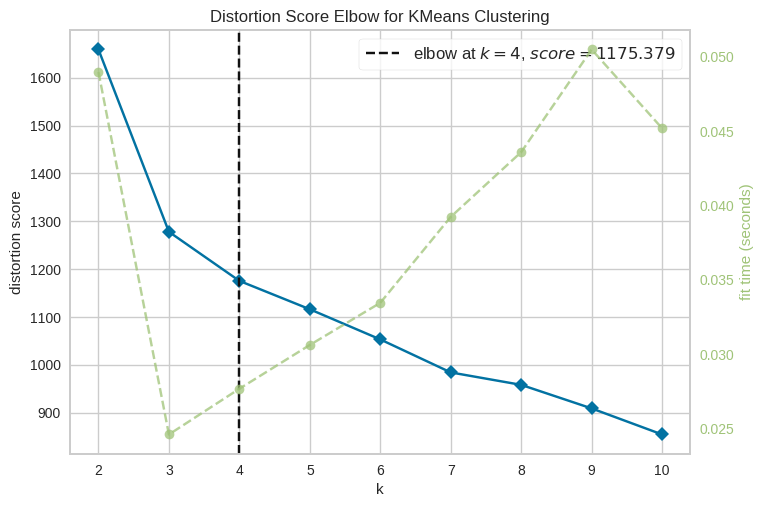

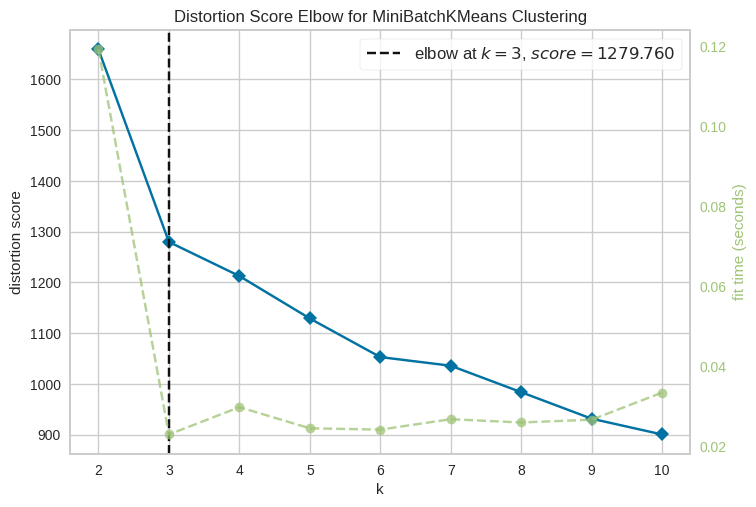

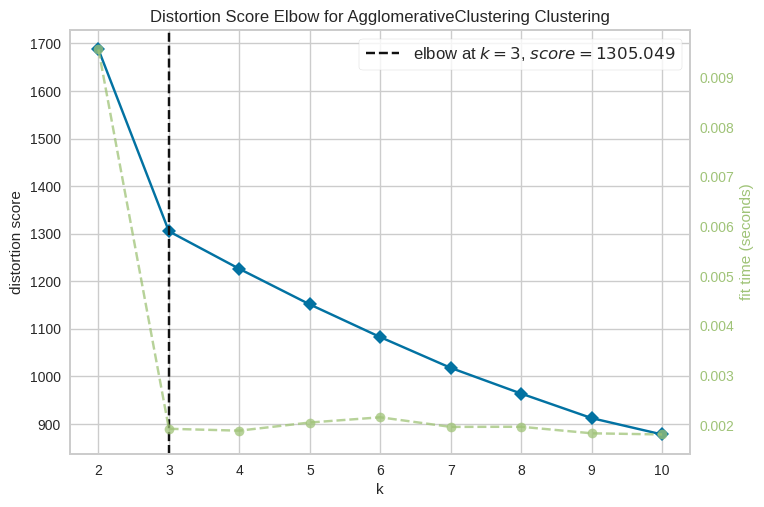

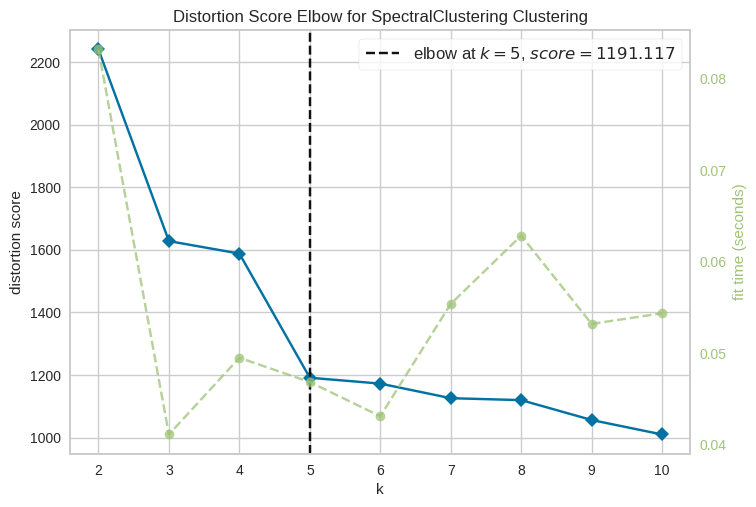

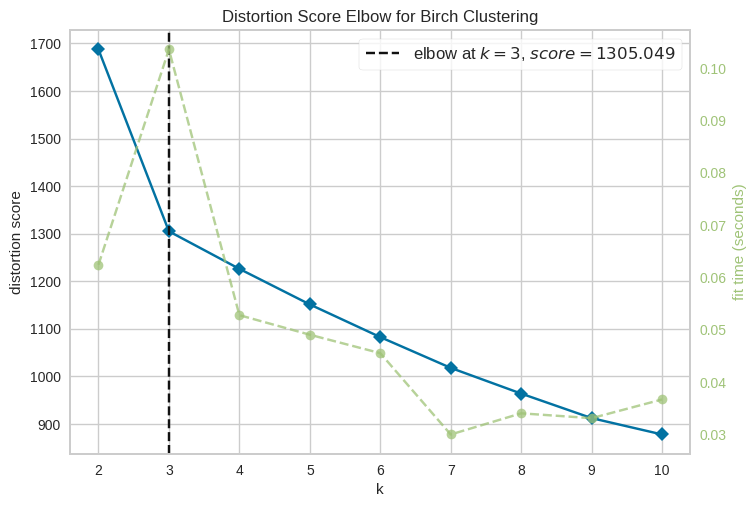

In [7]:
for algorithm in algorithms:
    model = KElbowVisualizer(algorithm)
    model.fit(X)
    model.show()

# Add target to dataframe and save

In [8]:
k = 3

In [9]:
kmeans = KMeans(n_clusters=k)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
y = kmeans.predict(X)

In [12]:
df_with_labels = pd.concat([df, pd.Series(y, name='labels')], axis=1)

In [13]:
df_with_labels.sample(10)

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,labels
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,2
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,2
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,2
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,2
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1


In [14]:
save_dataset('dataframe_with_labels', df_with_labels)